## 4-9. 프로젝트: Vocabulary Size를 변경해서 시도해보기

In [1]:
from tensorflow.keras.datasets import reuters
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 데이터 로드시 갯수결정

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=12000, test_split=0.2)

In [3]:
print(type(x_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
# (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [5]:
# (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=12000, test_split=0.2)

In [6]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 데이터 로드 후 형태 확인

In [7]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [8]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


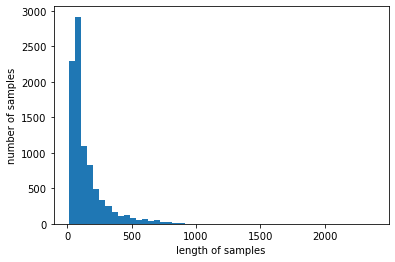

In [9]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

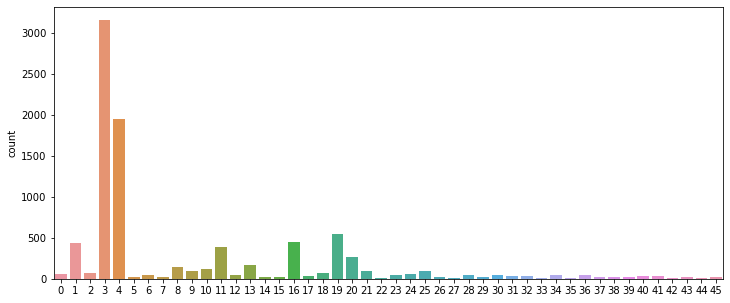

In [10]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

## 데이터 복원하기(TF-IDF방식을 사용하기 위해)

In [11]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [12]:
word_index['the']

1

In [13]:
print(len(word_index.items()))

30979


In [14]:
word_index['it']

13

In [15]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [16]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [17]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [18]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
len(index_to_word)

30982

In [20]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [21]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [22]:
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [23]:
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [24]:
print(len(x_train), len(x_test))

8982 2246


## 벡터화 하기

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 11540)


In [27]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 11540)


## 분류기

### 나이브베이즈 분류기

In [28]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [29]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [30]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6482635796972396


In [31]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.66      0.61      0.63       105
           2       0.00      0.00      0.00        20
           3       0.79      0.90      0.84       813
           4       0.50      0.96      0.65       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.68      0.53      0.59        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.74      0.53      0.62        99
          17       0.00    

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## CNB
* 데이터가 불균형할 경우를 대비해서 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기

In [32]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [33]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7742653606411398


In [34]:
print(classification_report(y_test, cb.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.65      0.90      0.75       105
           2       0.91      0.50      0.65        20
           3       0.90      0.90      0.90       813
           4       0.76      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.72      0.62        83
          12       0.00      0.00      0.00        13
          13       0.63      0.59      0.61        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.79      0.73        99
          17       0.00    

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 로지스틱회귀(Softmax Regression)

In [35]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [36]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8116651825467498


In [37]:
print(classification_report(y_test, lr.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.71      0.75      0.73        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.67      0.74      0.70        38
           9       0.82      0.92      0.87        25
          10       0.96      0.87      0.91        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16       0.71      0.76      0.73        99
          17       0.80    

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## SVM

In [38]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [39]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7791629563668745


In [40]:
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.69      0.71      0.70       105
           2       0.70      0.70      0.70        20
           3       0.91      0.91      0.91       813
           4       0.81      0.85      0.83       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.67      0.68      0.68        38
           9       0.88      0.88      0.88        25
          10       0.89      0.83      0.86        30
          11       0.63      0.73      0.68        83
          12       0.38      0.23      0.29        13
          13       0.49      0.49      0.49        37
          14       1.00      0.50      0.67         2
          15       0.71      0.56      0.63         9
          16       0.60      0.71      0.65        99
          17       0.75    

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 결정 트리(Decision Tree)

In [41]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [42]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6166518254674977


In [43]:
print(classification_report(y_test, tree.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.77      0.42      0.54       105
           2       0.60      0.45      0.51        20
           3       0.92      0.84      0.88       813
           4       0.39      0.90      0.55       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.86      0.83      0.85        30
          11       0.65      0.45      0.53        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.62      0.83      0.71        99
          17       0.00    

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 랜덤 포레스트(Random Forest)

In [44]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [45]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6825467497773821


In [46]:
print(classification_report(y_test, forest.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        12
           1       0.42      0.68      0.52       105
           2       0.33      0.35      0.34        20
           3       0.85      0.91      0.87       813
           4       0.63      0.85      0.73       474
           5       0.00      0.00      0.00         5
           6       0.80      0.57      0.67        14
           7       1.00      0.33      0.50         3
           8       0.61      0.58      0.59        38
           9       0.84      0.64      0.73        25
          10       0.64      0.23      0.34        30
          11       0.51      0.57      0.53        83
          12       0.40      0.15      0.22        13
          13       0.36      0.32      0.34        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.58      0.45      0.51        99
          17       0.00    

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 그래디언트 부스팅 트리(GradientBoostingClassifier)


In [47]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [48]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7684772929652716


In [49]:
print(classification_report(y_test, grbt.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.79      0.70      0.74       105
           2       0.67      0.70      0.68        20
           3       0.88      0.90      0.89       813
           4       0.76      0.84      0.80       474
           5       0.25      0.20      0.22         5
           6       0.91      0.71      0.80        14
           7       0.50      0.33      0.40         3
           8       0.63      0.63      0.63        38
           9       0.83      0.76      0.79        25
          10       0.86      0.83      0.85        30
          11       0.67      0.72      0.69        83
          12       0.43      0.46      0.44        13
          13       0.59      0.43      0.50        37
          14       0.09      0.50      0.15         2
          15       0.29      0.22      0.25         9
          16       0.68      0.74      0.71        99
          17       0.44    

## 보팅(Voting)

In [50]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [51]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8178984861976848


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.79      0.77      0.78       105
           2       0.73      0.80      0.76        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.70      0.68      0.69        38
           9       0.81      0.84      0.82        25
          10       0.96      0.87      0.91        30
          11       0.67      0.71      0.69        83
          12       0.46      0.46      0.46        13
          13       0.69      0.65      0.67        37
          14       0.22      1.00      0.36         2
          15       0.57      0.44      0.50         9
          16       0.72      0.76      0.74        99
          17       0.70    

## 딥러닝 모델과 비교

평가문항
상세기준
1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?

3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.

2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?

Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.

3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?

동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.

In [236]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import reuters

## 데이터 복원하기(TF-IDF방식을 사용하기 위해)

In [237]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [238]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [239]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [240]:
word_index['the']

1

In [241]:
print(len(word_index.items()))

30979


In [242]:
word_index['it']

13

In [243]:
index_to_word = {index : word for word, index in word_index.items()}

In [244]:
print(index_to_word[1])
print(index_to_word[13])

the
it


In [245]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [246]:
len(x_train[0])

87

In [247]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [248]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [249]:
x_train[0]

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [250]:
x_test[0]

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and of exports 3 purchased each it of profit 3 of profit agreement in around corp should for 3 cannot mln in ended said of a 54 but 3 of a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 of of said president amount pct dlrs'

In [251]:
from konlpy.tag import Mecab
mecab = Mecab()

def mecab_split(sentence):
    word = mecab.morphs(sentence)
    return word

X_train = []

for sentence in x_train:
    X_train.append(mecab_split(sentence))

In [252]:
def mecab_split(sentence):
    word = mecab.morphs(sentence)
    return word

X_test = []

for sentence in x_test:
    X_test.append(mecab_split(sentence))

In [253]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [254]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [255]:
max_len = 300
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 88.77755511022045


In [256]:
tokenizer = Tokenizer(len(X_train)) 
tokenizer.fit_on_texts(X_train)# 이걸 생략하면 단어장을 생성하지 않기 때문에 빈 리스트로 반환됨
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [257]:
import tensorflow as tf
X_train = tf.keras.preprocessing.sequence.pad_sequences(
    X_train, maxlen=300, padding='pre',
    truncating='pre'
)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    X_test, maxlen=300, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

In [258]:
X_train.shape# (8982, 300)

(8982, 300)

In [259]:
y_train.shape# (8982,)

(8982,)

In [260]:
num_word = tokenizer.get_config()['num_words']
num_word

8982

In [261]:
# X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


In [262]:
# # 단층 LSTM을 구현하기 위한 함수
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Embedding
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

# def lstm():
#     model = Sequential()
#     model.add(Embedding(8982, 100))
#     model.add(LSTM(50, return_sequences = False))
#     model.add(Dense(46, activation = 'softmax'))
# #     model.add(Activation('softmax'))
    
#     adam = optimizers.Adam(lr = 0.001)
#     model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
#     return model

In [263]:
# del model

In [265]:
model = Sequential()
model.add(Embedding(num_word, 100))
model.add(LSTM(50))
model.add(Dense(46, activation = 'softmax'))
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         898200    
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2346      
Total params: 930,746
Trainable params: 930,746
Non-trainable params: 0
_________________________________________________________________


In [266]:
X_train.shape

(8982, 300)

In [267]:
X_test.shape

(2246, 300)

In [268]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=46)

In [269]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=46)

In [270]:
# model = KerasClassifier(build_fn = lstm, epochs = 2, batch_size = 50, verbose = 1)
model.fit(X_train, y_train, batch_size = 16, epochs = 10)
y_pred = model.predict(X_test)
# y_test_ = np.argmax(y_test)

Epoch 1/10
562/562 [==============================] - 7s 13ms/step - loss: 2.1807 - accuracy: 0.4391
Epoch 2/10
562/562 [==============================] - 7s 13ms/step - loss: 1.6580 - accuracy: 0.5728
Epoch 3/10
562/562 [==============================] - 7s 13ms/step - loss: 1.5092 - accuracy: 0.6083
Epoch 4/10
562/562 [==============================] - 7s 13ms/step - loss: 1.3550 - accuracy: 0.6580
Epoch 5/10
562/562 [==============================] - 7s 13ms/step - loss: 1.1615 - accuracy: 0.7076
Epoch 6/10
562/562 [==============================] - 7s 13ms/step - loss: 1.0174 - accuracy: 0.7427
Epoch 7/10
562/562 [==============================] - 7s 13ms/step - loss: 0.8789 - accuracy: 0.7782
Epoch 8/10
562/562 [==============================] - 7s 13ms/step - loss: 0.7507 - accuracy: 0.8147
Epoch 9/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6464 - accuracy: 0.8366
Epoch 10/10
562/562 [==============================] - 7s 13ms/step - loss: 0.5409 - accura

In [271]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
18/18 [==============================] - 0s 8ms/step - loss: 1.2428 - accuracy: 0.7257
test loss, test acc: [1.2427741289138794, 0.7257346510887146]


1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?
* 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 해당 조건에서 로지스틱 회귀가 가장 높은 성능을 보이는것을 확인했습니다.

2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?
* Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.


다음 3가지 조건(단어사이즈)에 맞춰 실험하였습니다. 

num_words: 5000
* 나이브베이즈 0.67
* CNB 0.77
* 로지스틱회귀 0.81
* SVM 0.67
* 결정트리 0.61
* 랜덤포레스트 0.67
* 그래디언트 부스팅 0.77
* 보팅 0.82

num_words: 10000
* 나이브베이즈 0.67
* CNB 0.77
* 로지스틱회귀 0.80
* SVM 0.76
* 결정트리 0.61
* 랜덤포레스트 0.70
* 그래디언트 부스팅 0.76
* 보팅 0.81


num_words: 12000
* 나이브베이즈 0.65
* CNB 0.77
* 로지스틱회귀 0.81
* SVM 0.78
* 결정트리 0.61
* 랜덤포레스트 0.68
* 그래디언트 부스팅 0.77
* 보팅 0.82

결과적으로 너무 많은 단어, 너무 적은 단어는 오히려 성능이 하락했습니다. 평균적으로 가장 준수한 성능을 보인 단어 수는 10,000개였습니다. 가장 성능이 좋았던 모델은 보팅 모델이었으며, 훨씬 간단한 구조의 로지스틱 회귀가 이와 유사한 성능을 보여줬습니다. 트리계열은 고차원의 희소 데이터를 활용한 분류에는 구조적으로 맞지 않기 때문입니다. 따라서 이런 유형의 데이터는 선형분류 기법이 더 좋은 성능을 나타낼 수 밖에 없습니다.

3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?
* LSTM모델을 만들어 학습시켰습니다. 동일하게 자체 인코딩된 단어를 디코딩 후 형태소 분석기를 사용하여 토크나이징 후 분석하였습니다. LSTM acc는 하이퍼 파라미터 조정 후 약 72%를 달성하였습니다. 

## 회고

여러가지 머신러닝 예측모델을 알아볼 수 있어서 의미있는 노드였습니다. 기존 딥러닝 알고리즘뿐만 아니라 여러 방식으로 예측을 해보고 어떤식으로 차이가 있는지 알 수 있어서 좋았습니다. 딥러닝 모델도 만들어 전처리에서 모델 구현까지 일련의 과정을 경험해볼 수 있었습니다. 궁금한 점은 딥러닝 모델이 다른 머신러닝 방식에 비해 성능이 좋지 않았는데, 이것이 파인튜닝을 하면 나아질수 있는 문제인지, 아니면 모델이 너무 단순했기 때문인지 궁금합니다. 